# About Food Demand Forecasting Challenge

Demand forecasting is a key component to every growing online business. Without proper demand forecasting processes in place, it can be nearly impossible to have the right amount of stock on hand at any given time. A food delivery service has to deal with a lot of perishable raw materials which makes it all the more important for such a company to accurately forecast daily and weekly demand.
 
Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks — and push customers to seek solutions from your competitors. In this challenge, get a taste of demand forecasting challenge using a real dataset.
 

In [3]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pk
import seaborn as sns

#from imblearn.over_sampling import SMOTE                   #Import when unbalanced data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [89]:
# import food dataset
train = pd.read_csv("Food_train.csv")
test = pd.read_csv("FoodTest.csv")

In [90]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [91]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [92]:
train.shape

(456548, 9)

In [93]:
test.shape

(32573, 8)

In [94]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [95]:
#import centre dataset
centreDF = pd.read_csv("center.csv")
centreDF.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [96]:
#Prepare main dataset DF by mergeing centre dataset and Meal dataset
train = pd.merge(train,centreDF, on=['center_id'])
test = pd.merge(test,centreDF, on=['center_id'])

In [97]:
#import centre dataset
mealDF = pd.read_csv("meal.csv")
mealDF.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [98]:
#Prepare main dataset DF by mergeing centre dataset and Meal dataset
train = pd.merge(train,mealDF, on=['meal_id'])
test = pd.merge(test,mealDF, on=['meal_id'])

In [99]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [100]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [101]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [102]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [103]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [104]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
train.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


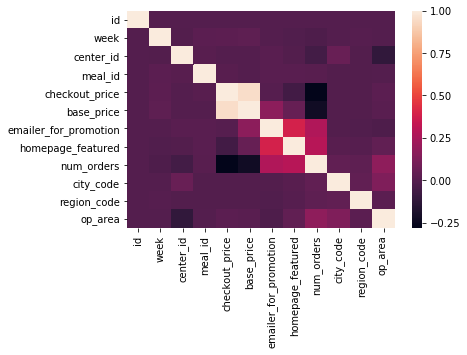

In [105]:
sns.heatmap(train.corr())

In [106]:
train['region_code']

0         56
1         56
2         56
3         56
4         56
5         56
6         56
7         56
8         56
9         56
10        56
11        56
12        56
13        56
14        56
15        56
16        56
17        56
18        56
19        56
20        56
21        56
22        56
23        56
24        56
25        56
26        56
27        56
28        56
29        56
          ..
456518    77
456519    77
456520    77
456521    77
456522    77
456523    77
456524    77
456525    77
456526    77
456527    77
456528    77
456529    77
456530    77
456531    77
456532    77
456533    77
456534    77
456535    77
456536    77
456537    77
456538    77
456539    77
456540    77
456541    77
456542    77
456543    77
456544    77
456545    77
456546    77
456547    77
Name: region_code, Length: 456548, dtype: int64

In [107]:
# use of .astype(np.object)
#check at end
#Name: region_code, Length: 456548, dtype: int64
#Name: region_code, Length: 456548, dtype: object
train['region_code'] = train['region_code'].astype(np.object)
train['region_code']

0         56
1         56
2         56
3         56
4         56
5         56
6         56
7         56
8         56
9         56
10        56
11        56
12        56
13        56
14        56
15        56
16        56
17        56
18        56
19        56
20        56
21        56
22        56
23        56
24        56
25        56
26        56
27        56
28        56
29        56
          ..
456518    77
456519    77
456520    77
456521    77
456522    77
456523    77
456524    77
456525    77
456526    77
456527    77
456528    77
456529    77
456530    77
456531    77
456532    77
456533    77
456534    77
456535    77
456536    77
456537    77
456538    77
456539    77
456540    77
456541    77
456542    77
456543    77
456544    77
456545    77
456546    77
456547    77
Name: region_code, Length: 456548, dtype: object

In [108]:
np.object

object

In [109]:
train = pd.get_dummies(train,drop_first=True)
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,0,0,0,1


In [110]:

train['discount'] = train['base_price'] - train['checkout_price']
train['discount_per'] = (train['discount'] / train['base_price'])*100
train['op_dis'] = train['discount_per']*train['op_area']
train['promo_homepage'] = train['emailer_for_promotion'] + train['homepage_featured']
train['week'] = train['week'].astype(np.object)
train['center_id'] = train['center_id'].astype(np.object)
train['meal_id'] = train['meal_id'].astype(np.object)
train['city_code'] = train['city_code'].astype(np.object)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 40 columns):
id                       456548 non-null int64
week                     456548 non-null object
center_id                456548 non-null object
meal_id                  456548 non-null object
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null object
op_area                  456548 non-null float64
region_code_34           456548 non-null uint8
region_code_35           456548 non-null uint8
region_code_56           456548 non-null uint8
region_code_71           456548 non-null uint8
region_code_77           456548 non-null uint8
region_code_85           456548 non-null uint8
region_code_93           456548 non-null uint8
center_type_TYPE_B       456548 n

In [112]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,discount,discount_per,op_dis,promo_homepage
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,1,15.46,10.151684,20.303369,0
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,1,16.46,10.808326,21.616652,0
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,1,1.00,0.746714,1.493429,0
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,1,-1.00,-0.741510,-1.483019,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,1,1.00,0.677966,1.355932,0


In [113]:
#dftest=test.merge(meal,on=['meal_id'],how='left')
#dftest=dftest.merge(ful,on=['center_id'],how='left')

test['region_code']=test['region_code'].astype(np.object)
test=pd.get_dummies(test,drop_first=True)
test['discount']=test['base_price']-test['checkout_price']
test['discount_per']=(test['discount']/test['base_price'])*100
test['op_dis']=test['discount_per']*test['op_area']
test['promo_homepage']=test['emailer_for_promotion']+test['homepage_featured']
test['week']=test['week'].astype(np.object)
test['center_id']=test['center_id'].astype(np.object)
test['meal_id']=test['meal_id'].astype(np.object)
test['city_code']=test['city_code'].astype(np.object)
test.shape
# dftest['region_code']=dftest['region_code'].astype(np.object)

(32573, 39)

In [114]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,op_area,...,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,discount,discount_per,op_dis,promo_homepage
0,1028232,146,55,1885,158.11,159.11,0,0,647,2.0,...,0,0,0,0,0,1,1.0,0.628496,1.256992,0
1,1262649,147,55,1885,159.11,159.11,0,0,647,2.0,...,0,0,0,0,0,1,0.0,0.000000,0.000000,0
2,1453211,149,55,1885,157.14,158.14,0,0,647,2.0,...,0,0,0,0,0,1,1.0,0.632351,1.264702,0
3,1262599,150,55,1885,159.14,157.14,0,0,647,2.0,...,0,0,0,0,0,1,-2.0,-1.272750,-2.545501,0
4,1495848,151,55,1885,160.11,159.11,0,0,647,2.0,...,0,0,0,0,0,1,-1.0,-0.628496,-1.256992,0


In [115]:
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split


X = train.drop(['id','num_orders'],axis=1)
y = train.num_orders
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1994)

categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [116]:
cat_model = CatBoostRegressor(n_estimators=1000, # use large n_estimators deliberately to make use of the early stopping
                         reg_lambda=1.0,
#                        l2_leaf_reg=4.0,
                         eval_metric='MSLE',
                         random_seed=1994,
                         learning_rate = 0.03,
                         depth = 11,
                               
#                        boosting_type = 'Ordered',
#                        subsample = 0.8
                         #rsm = 0.7,
                         #silent=True,
                         #max_ctr_complexity = 5,  # no of categorical cols combined
#                        #boosting_type = 'Ordered',
#                        #od_type = 'IncToDec',  #overfitting params
#                        #od_wait = 20)
                         bagging_temperature = 1.0)
                              
# lr=0.05, no od type of vars -- highest
    
cat_model.fit(X_train.values,y_train.values,cat_features=categorical_features_indices,
              eval_set=(X_test, y_test),plot=False,early_stopping_rounds=100,use_best_model=True,verbose_eval=50)

0:	learn: 9.8032239	test: 9.8354653	best: 9.8354653 (0)	total: 1.79s	remaining: 29m 51s
50:	learn: 0.4108414	test: 0.4069641	best: 0.4069641 (50)	total: 1m 12s	remaining: 22m 30s
100:	learn: 0.3584781	test: 0.3508233	best: 0.3507777 (99)	total: 2m 27s	remaining: 21m 49s
150:	learn: 0.3408415	test: 0.3314388	best: 0.3314388 (150)	total: 3m 51s	remaining: 21m 42s
200:	learn: 0.3244106	test: 0.3146621	best: 0.3145859 (199)	total: 5m 20s	remaining: 21m 16s
250:	learn: nan	test: 0.3036860	best: 0.3036860 (250)	total: 7m 4s	remaining: 21m 6s
300:	learn: nan	test: 0.2931444	best: 0.2931444 (300)	total: 8m 41s	remaining: 20m 11s
350:	learn: nan	test: 0.2841590	best: 0.2841590 (350)	total: 10m 18s	remaining: 19m 2s
400:	learn: nan	test: 0.2778834	best: 0.2778834 (400)	total: 11m 56s	remaining: 17m 49s
450:	learn: nan	test: 0.2713105	best: 0.2713105 (450)	total: 13m 35s	remaining: 16m 33s
500:	learn: nan	test: 0.2690162	best: 0.2690162 (500)	total: 15m 16s	remaining: 15m 12s
550:	learn: nan	test

In [117]:
sorted(zip(cat_model.feature_importances_,X_train),reverse=True)

[(26.86032043082001, 'meal_id'),
 (16.216871018258345, 'center_id'),
 (11.324052397700681, 'promo_homepage'),
 (6.60600159725213, 'checkout_price'),
 (5.50952517566182, 'discount_per'),
 (4.490288240927372, 'city_code'),
 (4.194838151728638, 'week'),
 (4.194047997234473, 'base_price'),
 (3.5577176244332342, 'op_dis'),
 (2.3686784573417827, 'op_area'),
 (2.2512619141566828, 'emailer_for_promotion'),
 (2.1052890578268917, 'cuisine_Italian'),
 (1.810861972358289, 'cuisine_Indian'),
 (1.6732542361327418, 'category_Sandwich'),
 (1.119992742191946, 'center_type_TYPE_C'),
 (1.0913750016202535, 'homepage_featured'),
 (1.030434993451769, 'discount'),
 (1.0140452596007326, 'center_type_TYPE_B'),
 (0.5326200635241457, 'region_code_85'),
 (0.4822407194450659, 'category_Rice Bowl'),
 (0.45754829283215914, 'region_code_93'),
 (0.35155346415199423, 'region_code_71'),
 (0.14676388125844178, 'region_code_77'),
 (0.14283044682895468, 'cuisine_Thai'),
 (0.12375765353591059, 'region_code_34'),
 (0.0833881

In [118]:
def pos(val):
    r=[]
    for i in val:
        if i<0:
            r.append(0)
        else:
            r.append(i)
    return r

In [119]:
from sklearn.metrics import mean_squared_log_error
preds = cat_model.predict(X_test)
print(100*np.sqrt(mean_squared_log_error(y_test,pos(preds))))

51.355671866619836


In [120]:
sum(preds<0)

1

In [121]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,op_area,...,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,discount,discount_per,op_dis,promo_homepage
0,1028232,146,55,1885,158.11,159.11,0,0,647,2.0,...,0,0,0,0,0,1,1.0,0.628496,1.256992,0
1,1262649,147,55,1885,159.11,159.11,0,0,647,2.0,...,0,0,0,0,0,1,0.0,0.000000,0.000000,0
2,1453211,149,55,1885,157.14,158.14,0,0,647,2.0,...,0,0,0,0,0,1,1.0,0.632351,1.264702,0
3,1262599,150,55,1885,159.14,157.14,0,0,647,2.0,...,0,0,0,0,0,1,-2.0,-1.272750,-2.545501,0
4,1495848,151,55,1885,160.11,159.11,0,0,647,2.0,...,0,0,0,0,0,1,-1.0,-0.628496,-1.256992,0


In [122]:
err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('start')
    cat_model5 = CatBoostRegressor(n_estimators=100, # use large n_estimators deliberately to make use of the early stopping
                         reg_lambda=1.0,
                         eval_metric='MSLE',
                         random_seed=1994,
                         learning_rate = 0.03,
                         depth = 11,
                         bagging_temperature = 1.0)
    cat_model5.fit(X_train.values,y_train.values,cat_features=categorical_features_indices,eval_set=(X_test, y_test),
        plot=False,early_stopping_rounds=100,use_best_model=True,verbose_eval=50) # early stopping set to 100 to prevent overfitting
    print('pred...')
    p = cat_model5.predict(X_test)
    if sum(p<0)>0:
        p=pos(p)
    print("err: ",100*np.sqrt(mean_squared_log_error(y_test,p)))
    err.append(100*np.sqrt(mean_squared_log_error(y_test,p)))
    pred = cat_model5.predict(test.drop('id',axis=1))
    y_pred_tot.append(pred)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


start
0:	learn: 9.6143715	test: 9.6831631	best: 9.6831631 (0)	total: 2.18s	remaining: 3m 36s
50:	learn: 0.4527654	test: 0.4529298	best: 0.4529298 (50)	total: 39.7s	remaining: 38.2s
99:	learn: 0.4243505	test: 0.4248073	best: 0.4248073 (99)	total: 1m 18s	remaining: 0us

bestTest = 0.4248072631
bestIteration = 99

pred...
err:  65.17724079075332
start
0:	learn: 9.6680588	test: 9.6621967	best: 9.6621967 (0)	total: 943ms	remaining: 1m 33s
50:	learn: 0.4560040	test: 0.4546419	best: 0.4546419 (50)	total: 38.1s	remaining: 36.6s
99:	learn: 0.4274497	test: 0.4255882	best: 0.4255882 (99)	total: 1m 10s	remaining: 0us

bestTest = 0.4255882139
bestIteration = 99

pred...
err:  65.23712309796501
start
0:	learn: 9.6971409	test: 9.7562289	best: 9.7562289 (0)	total: 715ms	remaining: 1m 10s
50:	learn: 0.4276589	test: 0.4357163	best: 0.4357163 (50)	total: 38.1s	remaining: 36.6s
99:	learn: 0.4067884	test: 0.4119964	best: 0.4119964 (99)	total: 1m 12s	remaining: 0us

bestTest = 0.4119963766
bestIteration = 9

In [123]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)

65.14301482720589


In [124]:
s=pd.DataFrame({'id':test.id,'num_orders':y_pred})
s.to_csv('stackedCBfold5.csv',index=False)
s.head()

,id,num_orders
0,1028232,267.508659
1,1262649,267.583602
2,1453211,267.508659
3,1262599,267.093450
4,1495848,265.042020
